In [1]:
import sympy as sp
from IPython.display import display, Math

# Define symbols
x, lambda_ = sp.symbols('x lambda', positive=True)

# Define the function and the pdf
f_x = x ** 2
pdf_x = lambda_ * sp.exp(-lambda_ * x)

# Calculate E[X], f(E[X]), and E[f(X)]
E_X = sp.integrate(x * pdf_x, (x, 0, sp.oo))  # E[X]
f_E_X = f_x.subs(x, E_X)  # f(E[X])
E_f_X = sp.integrate(f_x * pdf_x, (x, 0, sp.oo))  # E[f(X)]

# Simplify the results
E_X = sp.simplify(E_X)
f_E_X = sp.simplify(f_E_X)
E_f_X = sp.simplify(E_f_X)

# Display the results using Math for proper LaTeX rendering in Jupyter
display(Math(f"E[X] = {sp.latex(E_X)}"))
display(Math(f"E[f(X)] = {sp.latex(E_f_X)}"))
display(Math(f"f(E[X]) = {sp.latex(f_E_X)}"))

# Check if Jensen's inequality holds
jensen_inequality = sp.simplify(f_E_X <= E_f_X)
print("Does Jensen's Inequality hold?:", jensen_inequality)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Does Jensen's Inequality hold?: True


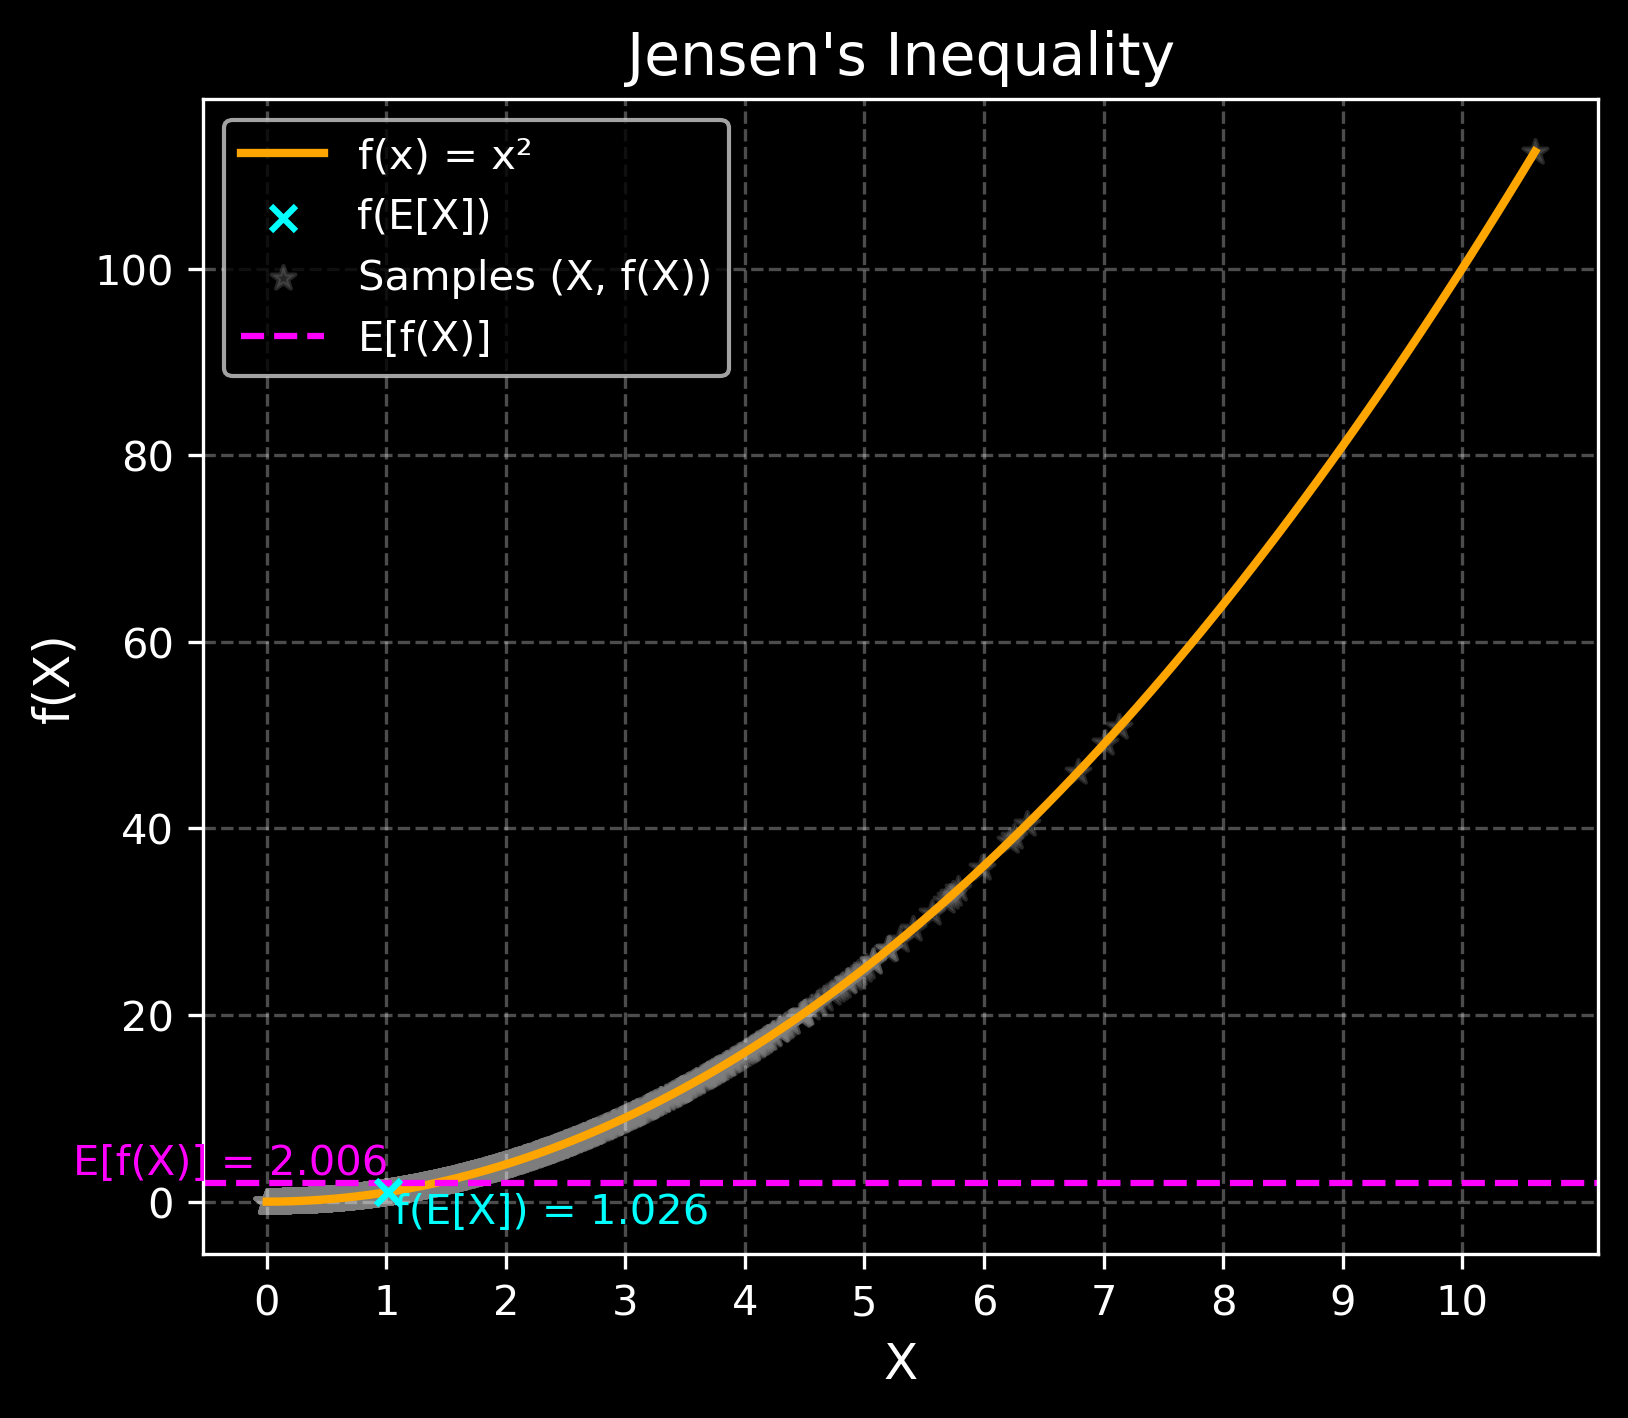

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Define a convex function f(x) = x^2
def f(x):
    return x**2

# Generate random samples for the random variable X using scipy.stats
np.random.seed(47)  # For reproducibility
plt.style.use('dark_background')

# Set scale parameter for the exponential distribution (1/λ)
scale_param = 1 # Lambda = 1
X = expon.rvs(scale=scale_param, size=5000)  # Exponential distribution samples

# Compute values
E_X = np.mean(X)              # E[X]
f_E_X = f(E_X)                # f(E[X])
E_f_X = np.mean(f(X))         # E[f(X)]

# Plot the convex function f(x) = x^2
x_vals = np.linspace(0, np.max(X), 100)
y_vals = f(x_vals)

plt.figure(figsize=(6, 5), dpi=300)
plt.plot(x_vals, y_vals, label="f(x) = x²", color="orange", linewidth=2)  # Function in orange

# Plot the points for Jensen's inequality
plt.scatter(E_X, f_E_X, color="cyan", label="f(E[X])", zorder=5, marker='x')  # f(E[X]) in green
plt.scatter(X, f(X), color="gray", alpha=0.3, label="Samples (X, f(X))", zorder=1, marker='*')  # Samples in gray
plt.axhline(y=E_f_X, color="magenta", linestyle="--", label="E[f(X)]")  # E[f(X)] in blue

# Annotate the plot
plt.text(E_X + 0.05, f_E_X, f"f(E[X]) = {f_E_X:.3f}", color="cyan", fontsize=10, ha='left', va='top')  # f(E[X]) annotation in green
plt.text(E_X, E_f_X, f"E[f(X)] = {E_f_X:.3f}", color="magenta", fontsize=10, ha='right', va='bottom')  # E[f(X)] annotation in blue

# Add labels and legend
plt.title("Jensen's Inequality", fontsize=14)
plt.xlabel("X", fontsize=12)
plt.ylabel("f(X)", fontsize=12)
plt.xticks([i for i in range(11)])
plt.legend(fontsize=10)
plt.grid(alpha=0.3, linestyle='--')
plt.show()

### Jensen's Inequality

- **Statement**:  
  For a convex function $f$ and a random variable $X$:  
  $$
  f(\mathbb{E}[X]) \leq \mathbb{E}[f(X)].
  $$

- **Convex Function**:  
  A function $f(x)$ is convex if:  
  $$
  f(\alpha x_1 + (1-\alpha)x_2) \leq \alpha f(x_1) + (1-\alpha)f(x_2), \quad \forall \alpha \in [0, 1].
  $$

- **Interpretation**:  
  The value of $f$ at the mean $\mathbb{E}[X]$ is always less than or equal to the average value of $f(X)$.

- **Key Terms**:
  - $f(\mathbb{E}[X])$: Function applied to the expected value of $X$.  
  - $\mathbb{E}[f(X)]$: Expected value of the function applied to $X$.  

- **Applications**:
  - **Optimization**: Guarantees for algorithms working with convex objectives.
  - **Variational Inference**: Jensen's inequality is the foundation for deriving the **evidence lower bound (ELBO)** in variational inference.  